# 2. Rapport individuel
Chaque étudiant doit rédiger un rapport individuel (10 à 20 pages maximum), structuré comme suit :

## a. Définition du problème :
- Identifiez la problématique métier à résoudre.
- Précisez les objectifs et les exigences du projet.

## b. Collecte des données :
- Choisissez un dataset pertinent pour votre projet.
- Évaluez la qualité et la quantité des données disponibles.


## Nettoyage et Préparation des Données

Après l'installation des dépendances, nous effectuons une **évaluation et un nettoyage des données** afin de garantir leur qualité et d'éviter les biais dans le modèle de Machine Learning.


📌 Aperçu des premières lignes du dataset :
   Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1             0                0                0                0   
2             0                0                0                0   
3            10             1239             2273              744   
4            11             1143             2209              744   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0             

/home/alexandre/Bureau/dev/projettaieb/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


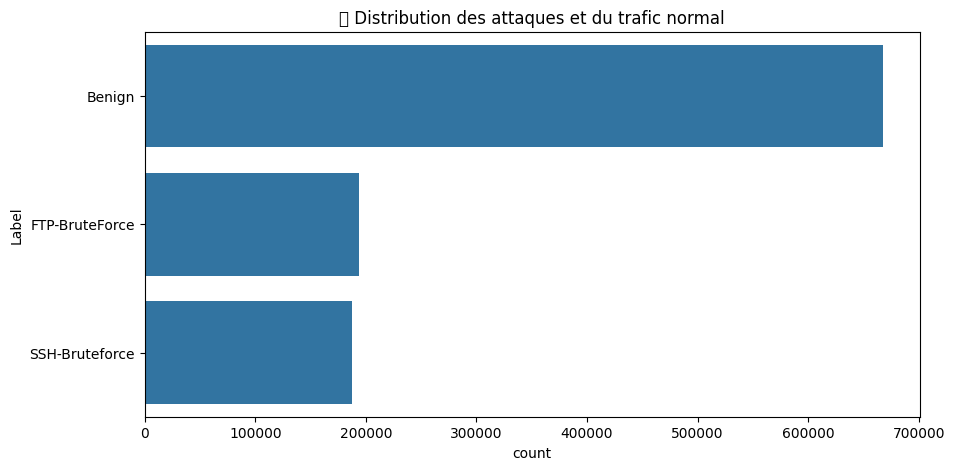


📌 Statistiques descriptives des variables numériques :


/home/alexandre/Bureau/dev/projettaieb/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/alexandre/Bureau/dev/projettaieb/.venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


           Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  1.048575e+06  1.048575e+06   1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.876262e+03  8.107557e+00   6.255555e+06  6.206622e+00  7.211191e+00   
std    1.444344e+04  4.460625e+00   1.260291e+09  4.447851e+01  1.048682e+02   
min    0.000000e+00  0.000000e+00  -9.190110e+11  1.000000e+00  0.000000e+00   
25%    2.200000e+01  6.000000e+00   7.000000e+00  1.000000e+00  1.000000e+00   
50%    5.300000e+01  6.000000e+00   1.023000e+03  2.000000e+00  1.000000e+00   
75%    4.430000e+02  6.000000e+00   4.066690e+05  7.000000e+00  6.000000e+00   
max    6.553300e+04  1.700000e+01   1.200000e+08  5.115000e+03  9.198000e+03   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     1.048575e+06     1.048575e+06     1.048575e+06     1.048575e+06   
mean      4.479936e+02     4.521803e+03     1.745736e+02     8.389535e+00   
std       1.573541e+04     1.515021e+05     2.87

/home/alexandre/Bureau/dev/projettaieb/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


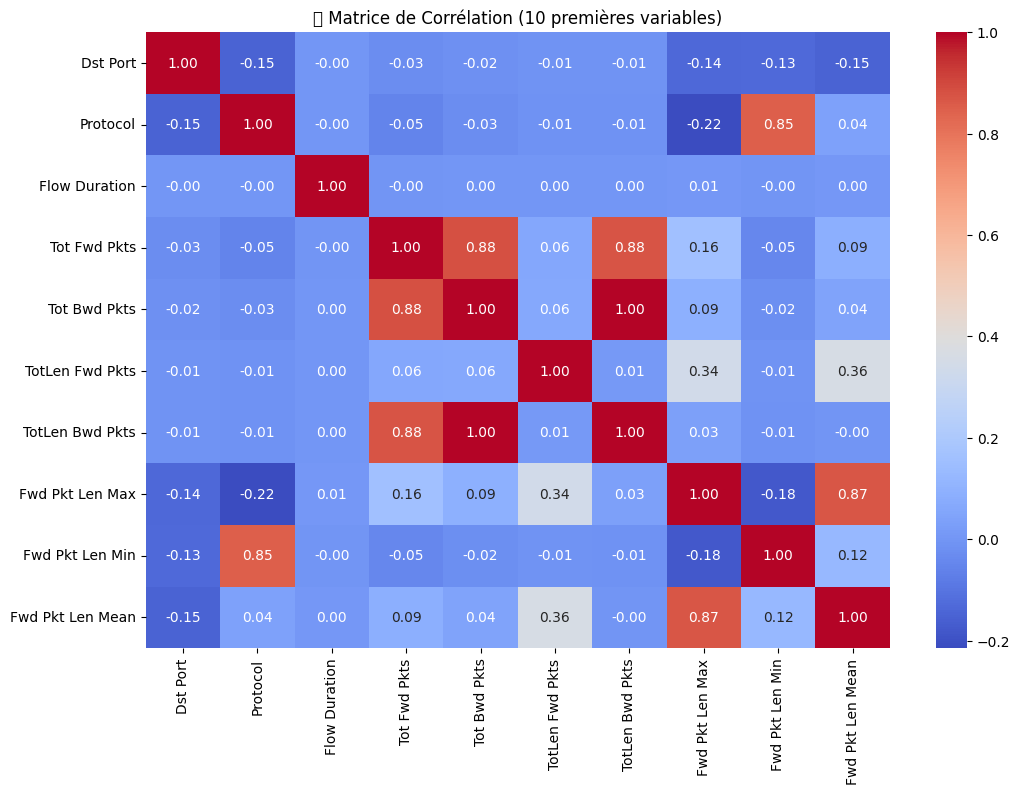


✅ Évaluation des données terminée !


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Charger un fichier CSV (ajuster le chemin selon l'emplacement du fichier)
file_path = "02-14-2018.csv"
df = pd.read_csv(file_path)

# 🔹 1. Aperçu du dataset
print("\n📌 Aperçu des premières lignes du dataset :")
print(df.head())

# 🔹 2. Informations générales sur le dataset
print("\n📌 Informations générales :")
print(df.info())

# 🔹 3. Nombre de lignes et de colonnes
print(f"\n📌 Nombre de lignes : {df.shape[0]}  |  Nombre de colonnes : {df.shape[1]}")

# 🔹 4. Vérification des valeurs manquantes
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # On garde uniquement les colonnes avec des valeurs nulles
print("\n📌 Colonnes avec valeurs manquantes :")
print(missing_values)

# 🔹 5. Distribution des classes (trafic normal vs attaques)
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Label'], order=df['Label'].value_counts().index)
plt.title("📊 Distribution des attaques et du trafic normal")
plt.show()

# 🔹 6. Statistiques descriptives des variables numériques
print("\n📌 Statistiques descriptives des variables numériques :")
print(df.describe())

# 🔹 7. Vérification des valeurs dupliquées
duplicates = df.duplicated().sum()
print(f"\n📌 Nombre de lignes dupliquées : {duplicates}")

# 🔹 8. Matrice de corrélation des 10 premières variables
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix.iloc[:10, :10], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Matrice de Corrélation (10 premières variables)")
plt.show()

print("\n✅ Évaluation des données terminée !")


## c. Nettoyage et préparation des données :
- Effectuez le nettoyage des données (gestion des doublons, traitement des valeurs manquantes, etc.).
- Transformez et formatez les données si nécessaire.
- Fusionnez différentes sources de données, le cas échéant.
